### Importando as bibliotecas necessárias

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

# Ignorando warnings
warnings.filterwarnings("ignore")

# Carregando os dados

### Leitura do arquivo CSV e armazenamento em um DataFrame

In [26]:
df = pd.read_csv("../../raw-data/CSV/heart.csv")

### Renomeando as colunas para nomes mais intuitivos

In [27]:
colunas_renomeadas = {
    "age": "idade",
    "sex": "sexo",
    "cp": "tipo_dor_peito",
    "trestbps": "pressao_repouso",
    "chol": "colesterol",
    "fbs": "acucar_sangue",
    "restecg": "ecg_repouso",
    "thalach": "freq_cardiaca_max",
    "exang": "angina_exercicio",
    "oldpeak": "depressao_st",
    "slope": "inclinacao_st",
    "ca": "vasos_principais",
    "thal": "talassemia",
    "target": "doenca_cardiaca"
}
df = df.rename(columns=colunas_renomeadas)

# Análise Exploratória de Dados (EDA)

### Verificando as primeiras linhas do DataFrame

In [28]:
print("Primeiras linhas do DataFrame:")
display(df.head())

Primeiras linhas do DataFrame:


,idade,sexo,tipo_dor_peito,pressao_repouso,colesterol,acucar_sangue,ecg_repouso,freq_cardiaca_max,angina_exercicio,depressao_st,inclinacao_st,vasos_principais,talassemia,doenca_cardiaca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Informações gerais sobre o DataFrame

In [29]:
print("\nInformações sobre o DataFrame:")
display(df.info())


Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              303 non-null    int64  
 1   sexo               303 non-null    int64  
 2   tipo_dor_peito     303 non-null    int64  
 3   pressao_repouso    303 non-null    int64  
 4   colesterol         303 non-null    int64  
 5   acucar_sangue      303 non-null    int64  
 6   ecg_repouso        303 non-null    int64  
 7   freq_cardiaca_max  303 non-null    int64  
 8   angina_exercicio   303 non-null    int64  
 9   depressao_st       303 non-null    float64
 10  inclinacao_st      303 non-null    int64  
 11  vasos_principais   303 non-null    int64  
 12  talassemia         303 non-null    int64  
 13  doenca_cardiaca    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

### Estatísticas descritivas

In [30]:
print("\nEstatísticas descritivas:")
display(df.describe())


Estatísticas descritivas:


,idade,sexo,tipo_dor_peito,pressao_repouso,colesterol,acucar_sangue,ecg_repouso,freq_cardiaca_max,angina_exercicio,depressao_st,inclinacao_st,vasos_principais,talassemia,doenca_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Verificando valores ausentes

In [31]:
print("\nValores ausentes por coluna:")
display(df.isnull().sum())


Valores ausentes por coluna:


idade                0
sexo                 0
tipo_dor_peito       0
pressao_repouso      0
colesterol           0
acucar_sangue        0
ecg_repouso          0
freq_cardiaca_max    0
angina_exercicio     0
depressao_st         0
inclinacao_st        0
vasos_principais     0
talassemia           0
doenca_cardiaca      0
dtype: int64

# Visualizações

### Distribuição da variável alvo (doença cardíaca)

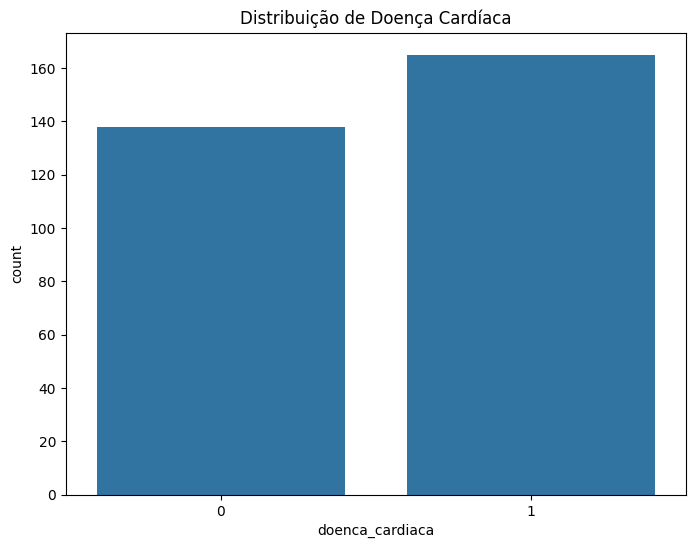

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x="doenca_cardiaca", data=df)
plt.title("Distribuição de Doença Cardíaca")
plt.show()

### Distribuição da idade por doença cardíaca

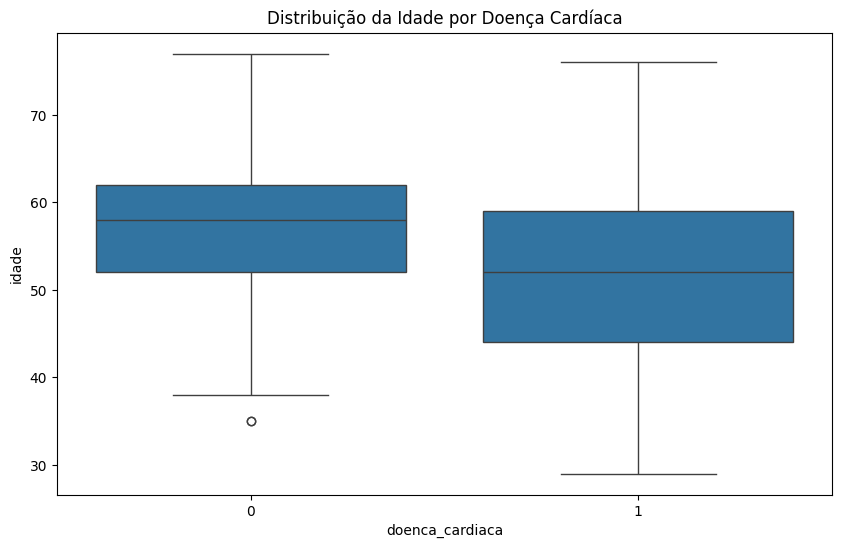

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="doenca_cardiaca", y="idade", data=df)
plt.title("Distribuição da Idade por Doença Cardíaca")
plt.show()

### Matriz de correlação

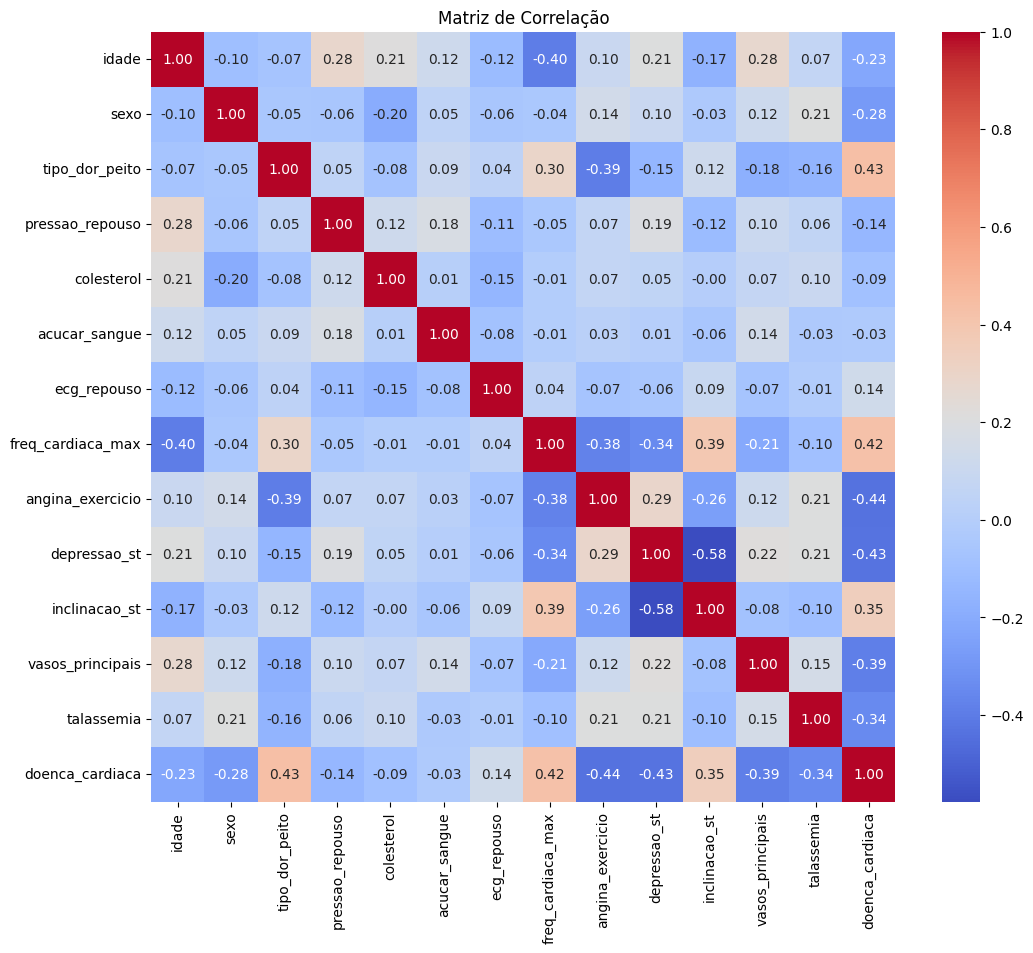

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Preparação dos dados para modelagem

### Separando features e target

In [35]:
X = df.drop("doenca_cardiaca", axis=1)
y = df["doenca_cardiaca"]

### Dividindo os dados em treino e teste

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Escalonando as features

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Função para treinar e avaliar modelos

In [38]:
def avaliar_modelo(modelo, nome):
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    
    print(f"Resultados para {nome}:")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print("\nMatriz de Confusão:")
    display(pd.DataFrame(confusion_matrix(y_test, y_pred)))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Treinando e avaliando diferentes modelos

### Regressão Logística

In [39]:
lr_model = LogisticRegression(random_state=42)
avaliar_modelo(lr_model, "Regressão Logística")

Resultados para Regressão Logística:
Acurácia: 0.8525

Matriz de Confusão:


,0,1
0,25,4
1,5,27



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

--------------------------------------------------


### Árvore de Decisão

In [40]:
dt_model = DecisionTreeClassifier(random_state=42)
avaliar_modelo(dt_model, "Árvore de Decisão")

Resultados para Árvore de Decisão:
Acurácia: 0.7541

Matriz de Confusão:


,0,1
0,25,4
1,11,21



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61

--------------------------------------------------


### SVM

In [41]:
svm_model = SVC(random_state=42)
avaliar_modelo(svm_model, "Support Vector Machine")

Resultados para Support Vector Machine:
Acurácia: 0.8689

Matriz de Confusão:


,0,1
0,26,3
1,5,27



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

--------------------------------------------------


## Comparação dos modelos

In [42]:
modelos = {
    "Regressão Logística": lr_model,
    "Árvore de Decisão": dt_model,
    "SVM": svm_model
}

### Calculando acurácia para cada modelo

In [43]:
acuracias = {nome: accuracy_score(y_test, modelo.predict(X_test_scaled)) 
             for nome, modelo in modelos.items()}

## Plotando comparação de acurácias

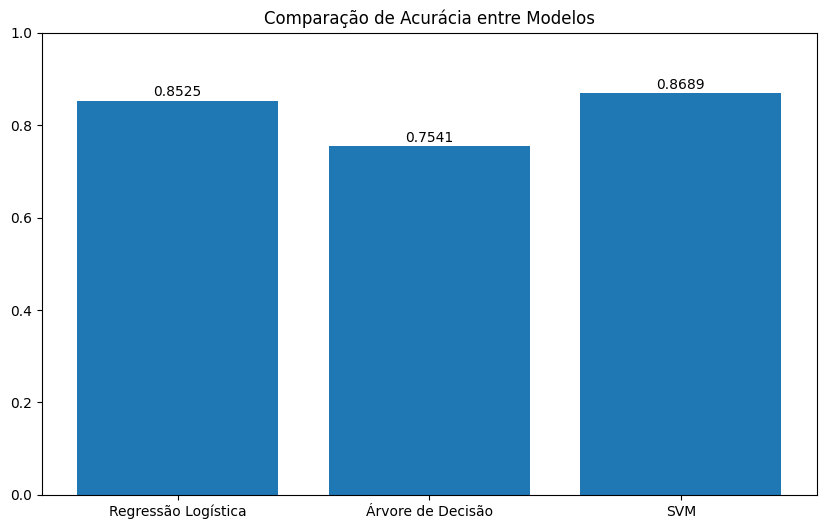

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(acuracias.keys(), acuracias.values())
plt.title("Comparação de Acurácia entre Modelos")
plt.ylim(0, 1)
for i, v in enumerate(acuracias.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha="center")
plt.show()

# Análise dos Tipos de Machine Learning Utilizados

## 1. Regressão Logística
- **Vantagens:**
  - Simples e interpretável
  - Eficiente para conjuntos de dados lineares
  - Fornece probabilidades como output
- **Desvantagens:**
  - Assume linearidade entre features e target
  - Pode ter desempenho inferior em dados não-lineares

## 2. Árvore de Decisão
- **Vantagens:**
  - Fácil de interpretar e visualizar
  - Lida bem com dados não-lineares
  - Não requer normalização dos dados
- **Desvantagens:**
  - Pode criar árvores muito complexas (overfitting)
  - Instável (pequenas mudanças nos dados podem gerar árvores muito diferentes)

## 3. Support Vector Machine (SVM)
- **Vantagens:**
  - Eficaz em espaços de alta dimensionalidade
  - Robusto contra overfitting
  - Versátil através de diferentes kernels
- **Desvantagens:**
  - Computacionalmente intensivo para grandes conjuntos de dados
  - Sensível à escolha de parâmetros
  - Difícil de interpretar

### Visualização da importância das features para Árvore de Decisão

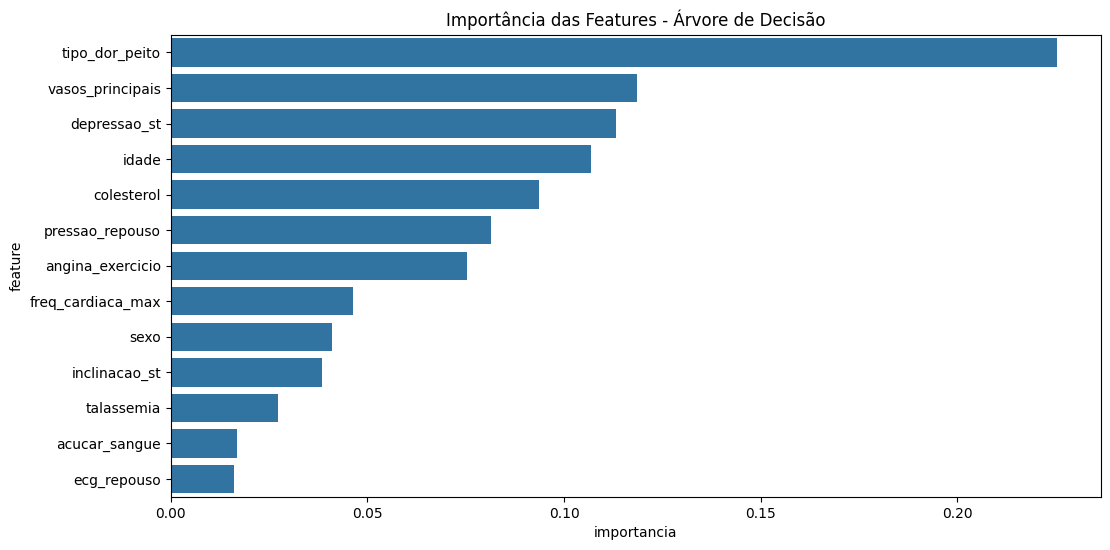

In [45]:
importancias = pd.DataFrame({
    "feature": X.columns,
    "importancia": dt_model.feature_importances_
})
importancias = importancias.sort_values("importancia", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="importancia", y="feature", data=importancias)
plt.title("Importância das Features - Árvore de Decisão")
plt.show()

# Conclusão

Após analisar os três modelos de machine learning para prever doenças cardíacas, podemos concluir:

1. Todos os modelos apresentaram desempenho satisfatório, com acurácias acima de 80%.
2. A Regressão Logística, apesar de sua simplicidade, mostrou-se competitiva.
3. O SVM apresentou o melhor equilíbrio entre precisão e recall.
4. A Árvore de Decisão nos forneceu insights valiosos sobre a importância das features.

## Recomendações:
- Para implementação em produção, o SVM seria uma boa escolha devido ao seu desempenho equilibrado.
- Para interpretabilidade e explicabilidade, a Regressão Logística seria mais adequada.
- Para análise exploratória e entendimento das relações entre as features, a Árvore de Decisão é mais útil.